Author(s):
* Luca Bianchi

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
# import cv2
import tensorflow as tf
import time
import dateutil
import sklearn.metrics as sm
from keras.layers import Bidirectional, LSTM, Dropout, Dense

In [2]:
df = pd.read_csv("../../dataset/KAG_energydata_complete.csv")

# Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [5]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


<Figure size 1000x600 with 0 Axes>

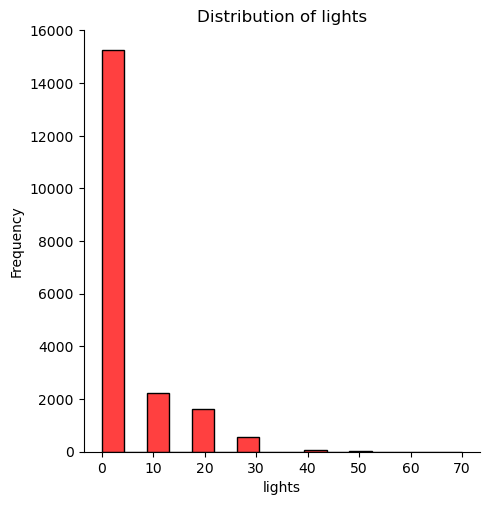

In [6]:
# Plot distribution of feature "lights"
plt.figure(figsize=(10, 6))
sns.displot(df['lights'], color='r')
plt.title('Distribution of lights')
plt.xlabel('lights')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

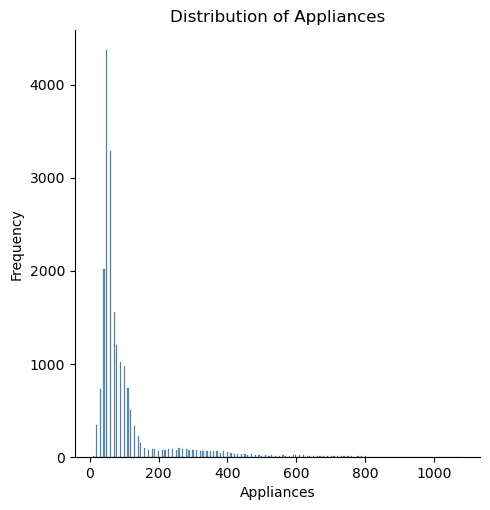

In [7]:
plt.figure(figsize=(10,6))
sns.displot(df['Appliances'])
plt.title('Distribution of Appliances')
plt.xlabel('Appliances')
plt.ylabel('Frequency')
plt.show()

C:\Users\Utente\AppData\Local\Temp\ipykernel_15756\1285032136.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


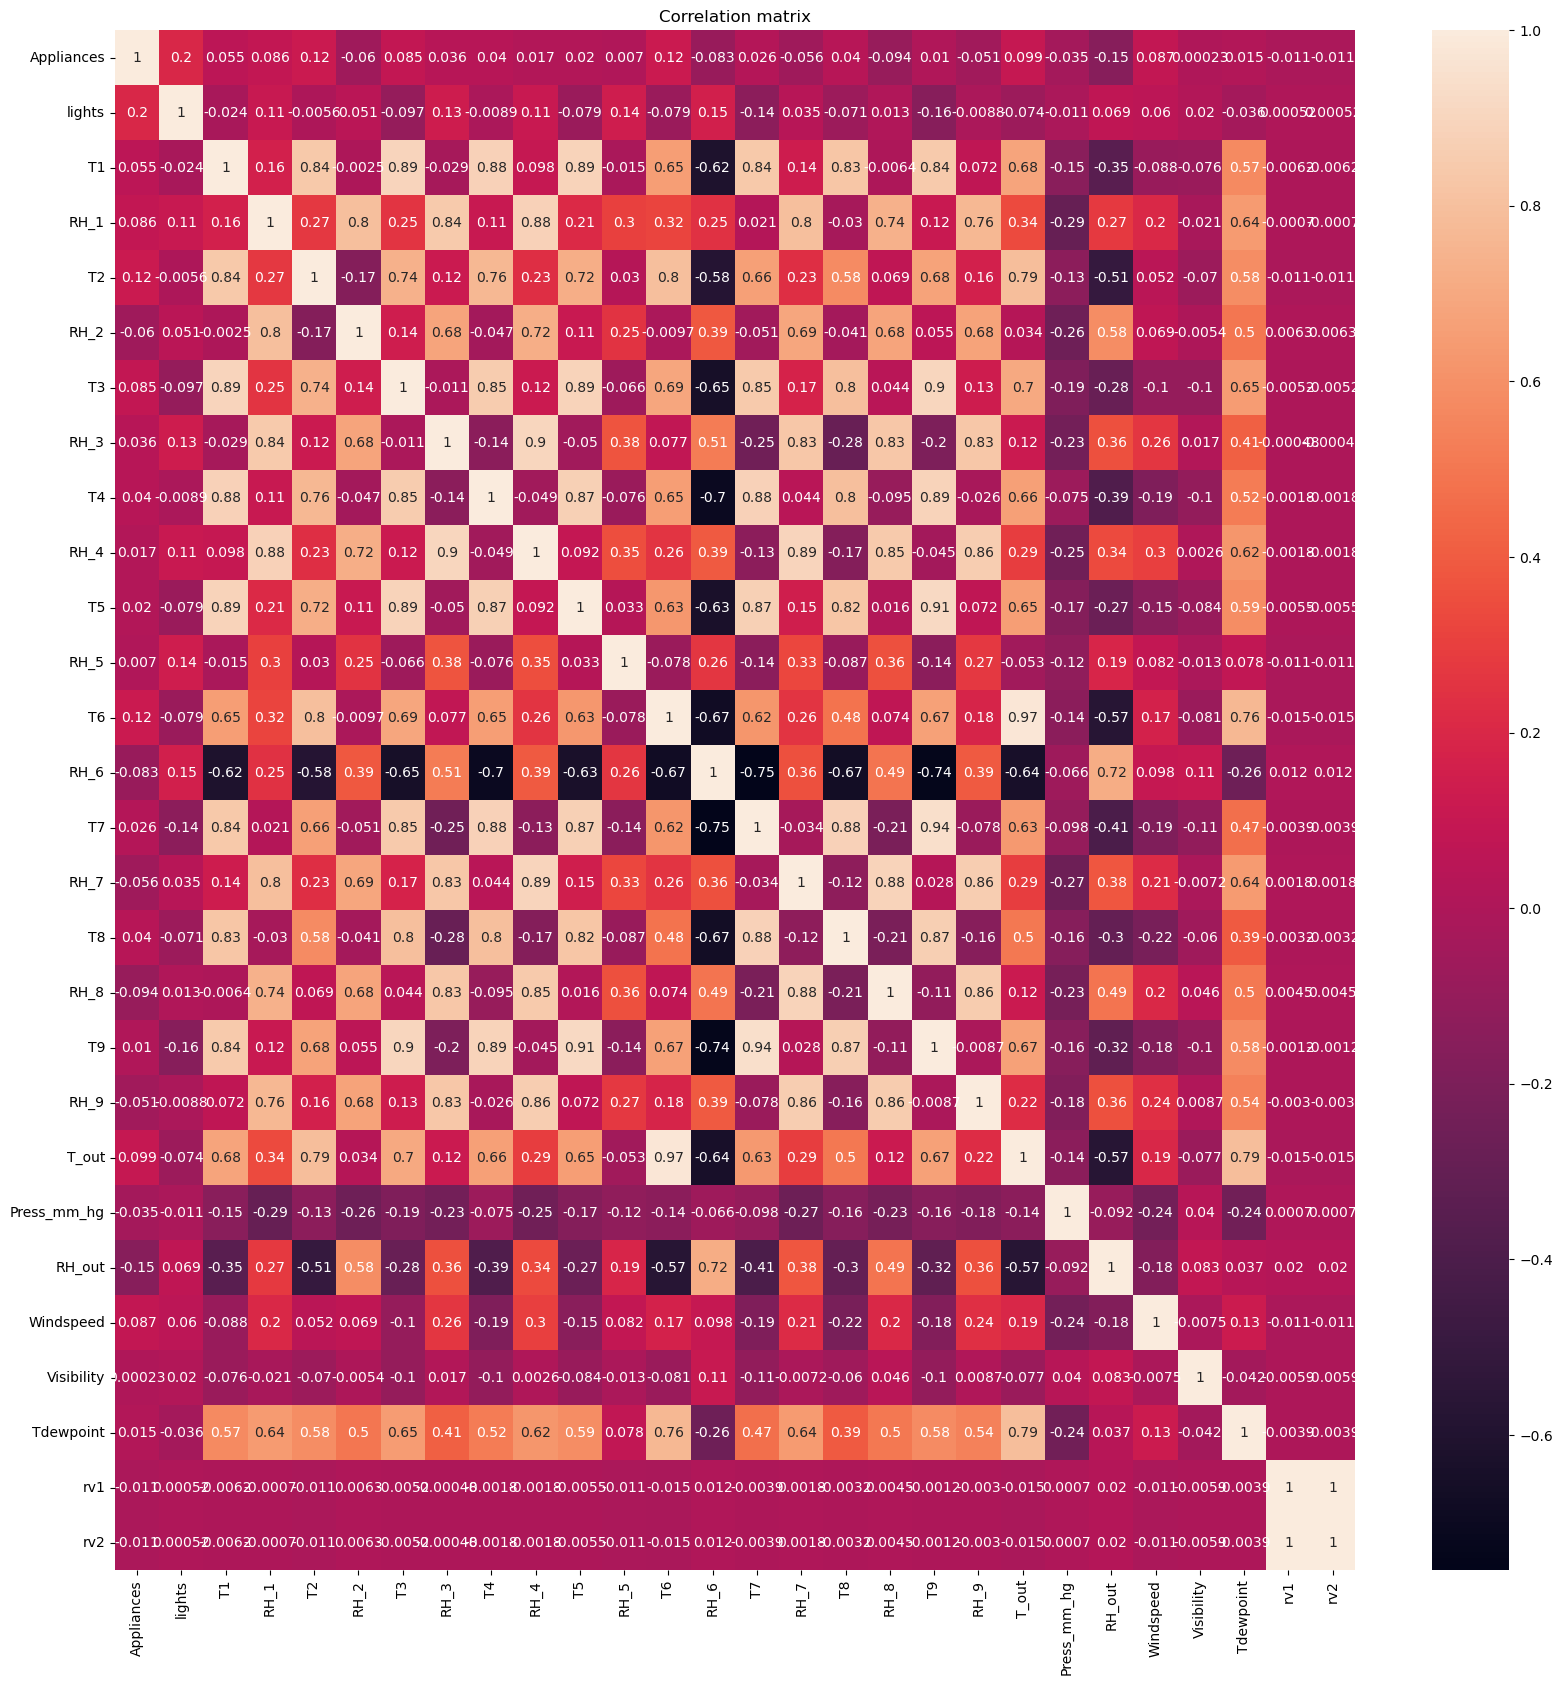

In [8]:
# Correlation matrix with label "Appliances"
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation matrix')
plt.show()

C:\Users\Utente\AppData\Local\Temp\ipykernel_15756\3570178070.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['Appliances']], annot=True)


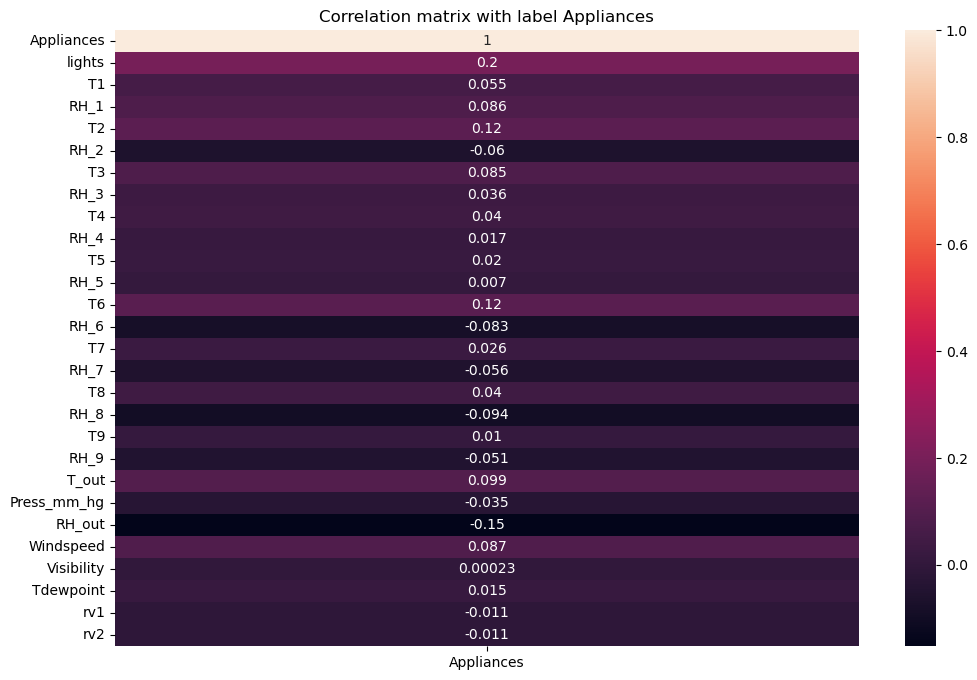

In [9]:
# Correlation matrix with label "Appliances"
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr()[['Appliances']], annot=True)
plt.title('Correlation matrix with label Appliances')
plt.show()

# PCA representation

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)
pca.fit(df.iloc[:, 2:27])

pca_transf = pca.transform(df.iloc[:, 2:27])
pca_df = pd.DataFrame(pca_transf, columns=["component_1", "component_2"])

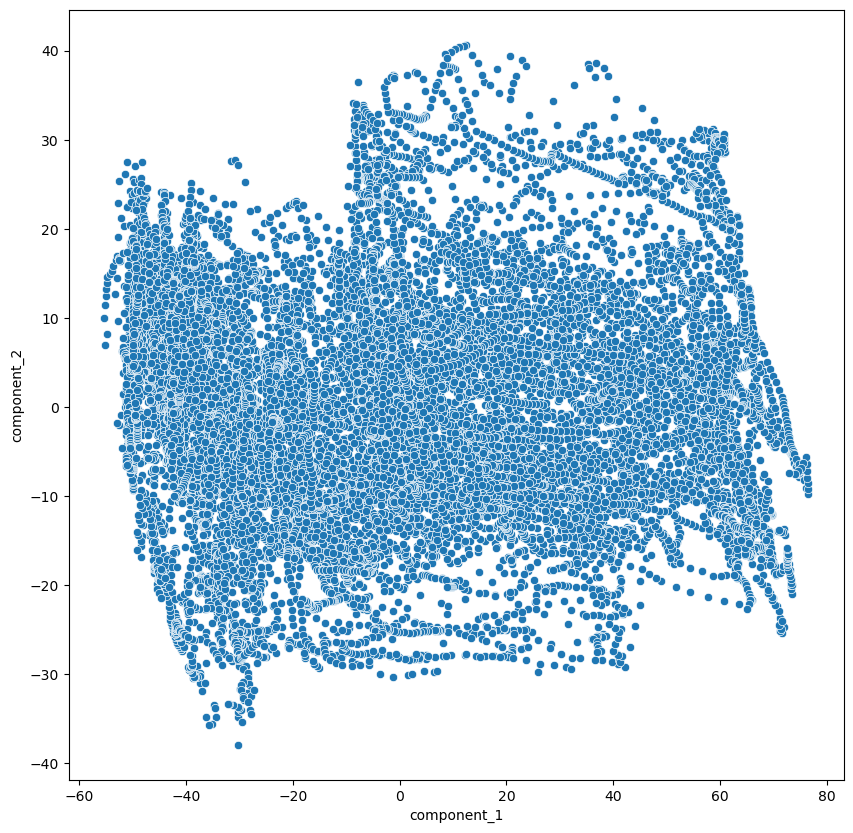

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(pca_df, x="component_1", y="component_2")
plt.show()

# Model LSTM

In [13]:
from math import sqrt
# from sklearn.model_selection import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot

In [14]:
data = df.copy()

In [15]:
data.columns = [x.lower() for x in data.columns]
data = data[data['appliances'].between(data['appliances'].quantile(.0), data['appliances'].quantile(.99))]

In [16]:
data["exact_date"] = data['date'].str.split(' ').str[0]

data["hours"] = (data['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)
data["seconds"] = ((data['date'].str.split(':').str[1])).astype(str).astype(int).mul(60)

data["week"] = (data['date'].str.split(' ').str[0])
data["week"] = (data['week'].apply(dateutil.parser.parse, dayfirst=True))
data["weekday"] = (data['week'].dt.dayofweek).astype(str).astype(int)
data["week"]=  (data['week'].dt.day_name())

data['log_appliances'] = np.log(data.appliances)
data['hour*lights'] = data.hours * data.lights
data['hour_avg'] = list(map(dict(data.groupby('hours')["appliances"].mean()).get, data.hours))

In [17]:
# Data sets in 30 minitues and 1 hour basis
data['date'] = pd.to_datetime(data['date'])

# Set date as index
data = data.set_index('date')

# Sort data by date
data = data.sort_index()

df_hour = data.resample('1H').mean()
df_30min = data.resample('30min').mean()

C:\Users\Utente\AppData\Local\Temp\ipykernel_15756\2245614425.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hour = data.resample('1H').mean()
C:\Users\Utente\AppData\Local\Temp\ipykernel_15756\2245614425.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_30min = data.resample('30min').mean()


In [18]:
# Qualitative predictors 
'''We assume that we have low(high) energy load when the appliances consumption is lower(higher) 
   than a given point of the hourly average counsumption. This point is dependent of data time frequency 
   and the numbers below are set after several tryouts based on appliances' consumption standard deviation.
'''

data['low_consum'] = (data.appliances+25<(data.hour_avg))*1
data['high_consum'] = (data.appliances+100>(data.hour_avg))*1

df_hour['low_consum'] = (df_hour.appliances+25<(df_hour.hour_avg))*1
df_hour['high_consum'] = (df_hour.appliances+25>(df_hour.hour_avg))*1

df_30min['low_consum'] = (df_30min.appliances+25<(df_30min.hour_avg))*1
df_30min['high_consum'] = (df_30min.appliances+35>(df_30min.hour_avg))*1

In [19]:
for cat_feature in ['weekday', 'hours']:
    df_hour = pd.concat([df_hour, pd.get_dummies(df_hour[cat_feature])], axis=1)
    df_30min = pd.concat([df_30min, pd.get_dummies(df_30min[cat_feature])], axis=1)
    df = pd.concat([data, pd.get_dummies(data[cat_feature])], axis=1)

# Modelling

In [20]:
feature_columns = ['low_consum','high_consum','hours','t6','rh_6','lights','hour*lights',
               'tdewpoint','visibility','press_mm_hg','windspeed']

In [21]:
# to avoid warnings from standardscaler
df_hour.lights = df_hour.lights.astype(float)
df_hour.log_appliances = df_hour.log_appliances.astype(float)
df_hour.hour = df_hour.hours.astype(float)
df_hour.low_consum = df_hour.low_consum.astype(float)
df_hour.high_consum = df_hour.high_consum.astype(float)

C:\Users\Utente\AppData\Local\Temp\ipykernel_15756\2665868572.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_hour.hour = df_hour.hours.astype(float)


In [22]:
# Split the data into training and test sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [23]:
scaler = StandardScaler()
train_data[feature_columns] = scaler.fit_transform(train_data[feature_columns])
test_data[feature_columns] = scaler.transform(test_data[feature_columns])

C:\Users\Utente\AppData\Local\Temp\ipykernel_15756\873235426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[feature_columns] = scaler.fit_transform(train_data[feature_columns])
C:\Users\Utente\AppData\Local\Temp\ipykernel_15756\873235426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[feature_columns] = scaler.transform(test_data[feature_columns])


In [24]:
# Normalize the target column 'Appliances'
appliances_scaler = StandardScaler()
train_data['appliances'] = appliances_scaler.fit_transform(train_data[['appliances']])
test_data['appliances'] = appliances_scaler.transform(test_data[['appliances']])

C:\Users\Utente\AppData\Local\Temp\ipykernel_15756\1668311986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['appliances'] = appliances_scaler.fit_transform(train_data[['appliances']])
C:\Users\Utente\AppData\Local\Temp\ipykernel_15756\1668311986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['appliances'] = appliances_scaler.transform(test_data[['appliances']])


## LSTM

In [25]:
def create_sequences(data, feature_columns, target_column, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[feature_columns].iloc[i:i+sequence_length].values)
        targets.append(data[target_column].iloc[i+sequence_length])
    return np.array(sequences), np.array(targets)

sequence_length = 10  # Adjust based on your needs
X_train, y_train = create_sequences(train_data, feature_columns, 'appliances', sequence_length)
X_test, y_test = create_sequences(test_data, feature_columns, 'appliances', sequence_length)

In [26]:
# X_train = create_sequence(X_train, 10)
# X_test  = create_sequence(X_test, 10)
# y_train = y_train[-X_train.shape[0]:]
# y_test  = y_test[-X_test.shape[0]:]

In [27]:
# # network architecture
# model = Sequential()
# model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='adam')

# # fit
# history = model.fit(X_train, y_train, epochs=66, batch_size=10, validation_data=(X_test, y_test), verbose=2, shuffle=False)

# # Building the model
# model = Sequential()
# # Adding a Bidirectional LSTM layer
# model.add(Bidirectional(LSTM(64, return_sequences=True, dropout=0.5, input_shape=(X_train.shape[1], X_train.shape[-1]))))
# model.add(Bidirectional(LSTM(20, dropout=0.5)))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='rmsprop')

# # Training the model
# model.fit(X_train, y_train, batch_size=128, epochs=50)

In [28]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, len(feature_columns))))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
391/391 [==============================] - 16s 25ms/step - loss: 0.8436 - val_loss: 0.6504
Epoch 2/20
391/391 [==============================] - 8s 21ms/step - loss: 0.7279 - val_loss: 0.6116
Epoch 3/20
391/391 [==============================] - 8s 20ms/step - loss: 0.6749 - val_loss: 0.6211
Epoch 4/20
391/391 [==============================] - 8s 20ms/step - loss: 0.6446 - val_loss: 0.6303
Epoch 5/20
391/391 [==============================] - 8s 20ms/step - loss: 0.6131 - val_loss: 0.6487
Epoch 6/20
391/391 [==============================] - 8s 20ms/step - loss: 0.5942 - val_loss: 0.6473
Epoch 7/20
391/391 [==============================] - 8s 21ms/step - loss: 0.5828 - val_loss: 0.6432
Epoch 8/20
391/391 [==============================] - 8s 20ms/step - loss: 0.5631 - val_loss: 0.6493
Epoch 9/20
391/391 [==============================] - 8s 20ms/step - loss: 0.5473 - val_loss: 0.6452
Epoch 10/20
391/391 [==============================] - 8s 20ms/step - loss: 0.5279 - val_l

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            12400     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 32,651
Trainable params: 32,651
Non-trainable params: 0
_________________________________________________________________


122/122 [==============================] - 2s 7ms/step


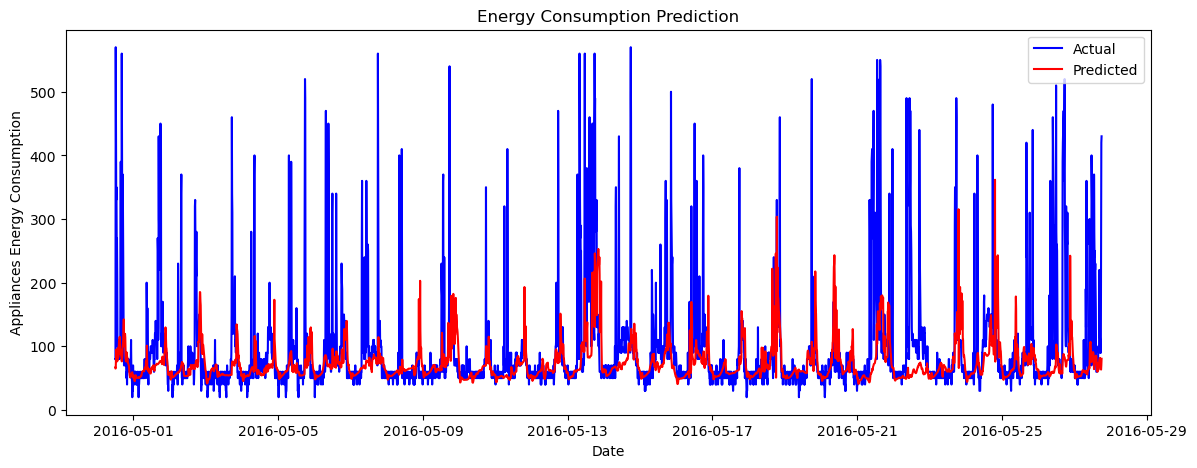

In [30]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to get them back to the original scale
y_pred = appliances_scaler.inverse_transform(y_pred)
y_test = appliances_scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(test_data.index[sequence_length:], y_test, color='blue', label='Actual')
plt.plot(test_data.index[sequence_length:], y_pred, color='red', label='Predicted')
plt.title('Energy Consumption Prediction')
plt.xlabel('Date')
plt.ylabel('Appliances Energy Consumption')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import r2_score

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('The RMSE score on the Test set is: %.3f' % rmse)

The R2 score on the Test set is:	0.036
The RMSE score on the Test set is: 74.407
